# Домашнее задание №1

## Часть I: О теореме Байеса

<details>
  <summary> Произошло убийство... </summary>
На месте убийства найдена кровь, которая явно (с вероятностью 1) принадлежит настоящему убийце. Кровь принадлежит редкой группе, которая присутствует всего лишь у 1% населения. И так получилось, что у подсудимого как раз эта редкая группа крови
1. Первым выходит прокурор и говорит: "Шанс, что у подсудимого была бы именно такая группа крови, если бы он был невиновен всего 1%, значит с вероятностью 99% он виновен, предлагаю осудить". В чём неправ прокурор? Какие вероятности он оценил, а какие должен был оценить?
</details>

Поскольку рассматривается единственное свидетельство - совпадение группы крови - сформулируем задачу следующим образом.  
Имеется априорное распределение группы кровы, аналогичной найденной, среди населения $$ P(B) = 0.01 $$  
Предположим случайный выбор подсудимого. Априорная вероятность того, что убийца - подсудимый $$ P(K) $$  
Вероятность того, что кровь принадлежит подсудимому при условии, что он убийца $$ P(B|K) = 1 $$  
Эти данные позволяют нам оценить вероятность того, что подсудимый убийца при условии, что его группа крови совпадает с найденной: $$ P(K|B) $$  
Она равна $$ P(K|B) = {{P(B|K)P(K)}\over{P(B)}} $$
  
Или в числах (если в городе живёт 1 млн человек): $$ P(K|B) = {1 \cdot 10^{-6} \over 0.01} = 10^{-4} $$  
Её и следовало оценить прокурору


Прокурор оценил вероятность того, что у подсудимого была бы такая же группа крови при условии, что он невиновен $$ P(B| \overline K) = 0.01 $$, и из неё $$ P(\overline B| \overline K) =0.99 $$, но сделал неверный вывод о том, что последняя - это вероятность того, что подсудимый виновен. На самом деле это вероятность того, что у подсудимого была бы другая группа крови, если бы он был невиновен.

<details>
  <summary> Затем выходит адвокат,... </summary>
объясняет ошибки прокурора и берёт слово сам: "В городе живёт миллион человек. Это значит, что примерно у 10000 из них такая группа крови. Значит, всё, что говорит нам эта кровь - это то, что подсудимый совершил убийство с вероятностью 0.01%. Получается, что это свидетельство не просто не является строгим доказательством, а и вовсе даёт нам ничтожно малую вероятность того, что мой подзащитный виновен, так что предлагаю исключить его из материалов дела". В чём неправ адвокат? Какие вероятности он оценил, а какие должен был оценить?
<\details>

Адвокат неявно оценил вероятность того, что подсудимый виновен при условии совпадения группы крови $$ P(K|B) $$ (то есть правильную вероятность), но представил её как априорную $$ P(K) $$, попытавшись исключить свидетельство из материалов дела

<details>
  <summary> 3. Вернёмся к тесту на страшную болезнь из первой лекции... </summary> По предположениям задачи болеет 1% населения, а тест имеет вероятность ошибки 5% в обе стороны. Мы видели, что в результате человек с положительным тестом имеет апостериорную вероятность оказаться больным всего лишь около 16%  
Врачи решили, что терпеть это никак нельзя; они готовы провести срочное исследование и улучшить качество теста. Но сил и денег хватит только для того, чтобы сократить один тип ошибок, т.е. уменьшить или только число false positives (когда тест выдаёт положительный результат у здорового человека), или только число false negatives (когда тест выдаёт отрицательный результат у больного).  
Помогите медикам: постройте зависимости апостериорной вероятности болезни после положительного и отрицательного теста от обоих видов ошибок (например, в виде графиков), сделайте выводы и дайте рекомендации врачам - на чём лучше сосредоточиться?

In [1]:
# not implemented yet

# Часть II: О линейной регрессии
Эта часть первого домашнего задания связана с анализом конкретного датасета. Датасет давайте возьмём довольно релевантный реальной жизни; он доступен по следующей ссылке:  
https://ourworldindata.org/coronavirus-source-data

1. Скачайте данные в формате csv, выберите из таблицы данные по России, начиная с 3 марта 2020г. (в этот момент впервые стало больше 2 заболевших). В качестве целевой переменной возьмём число случаев заболевания (столбцы total_cases и new_cases); для упрощения обработки можно заменить в столбце new_cases все нули на единицы. Для единообразия давайте зафиксируем тренировочный набор в виде первых 50 отсчётов (дней), начиная с 3 марта; остальные данные можно использовать в качестве тестового набора (и он даже будет увеличиваться по мере выполнения задания). Иначе говоря, мы будем "играть" за российские власти, которые пытаются понять, что делать, глядя на данные об эпидемии в мае 2020 года.

In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
from datetime import datetime, date
from sklearn import linear_model
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_palette("colorblind")
palette = sns.color_palette()
figsize = (16,10)
legend_fontsize = 16

In [3]:
# Скачайте данные

url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'
local_data_path = Path('./owid-covid-data.csv')
if local_data_path.exists():
    dataframe = pd.read_csv(local_data_path)
else:
    dataframe = pd.read_csv(url)
    dataframe.to_csv(local_data_path)

In [4]:
# выберите из таблицы данные по России
russia_dataframe = dataframe[dataframe['location'] == 'Russia']
# начиная с 3 марта 2020 г
start_date = pd.Timestamp(2020, 3, 3)
working_dataframe = russia_dataframe[pd.to_datetime(russia_dataframe['date']) >= start_date]
# Для упрощения обработки можно заменить в столбце new_cases все нули на единицы
working_dataframe.loc[(working_dataframe.new_cases == 0), 'new_cases'] = 1.0
# Для единообразия давайте зафиксируем тренировочный набор в виде первых 50 отсчётов (дней)
train_dataframe = working_dataframe[:50] # .reset_index()
# остальные данные можно использовать в качестве тестового набора
test_dataframe = working_dataframe[50:]

/home/dmitry/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


2. Постройте графики целевых переменных. Вы увидите, что число заболевших растёт очень быстро, на первый взгляд экспоненциально. Для первого подхода к снаряду давайте это и используем

In [5]:
# train_dataframe

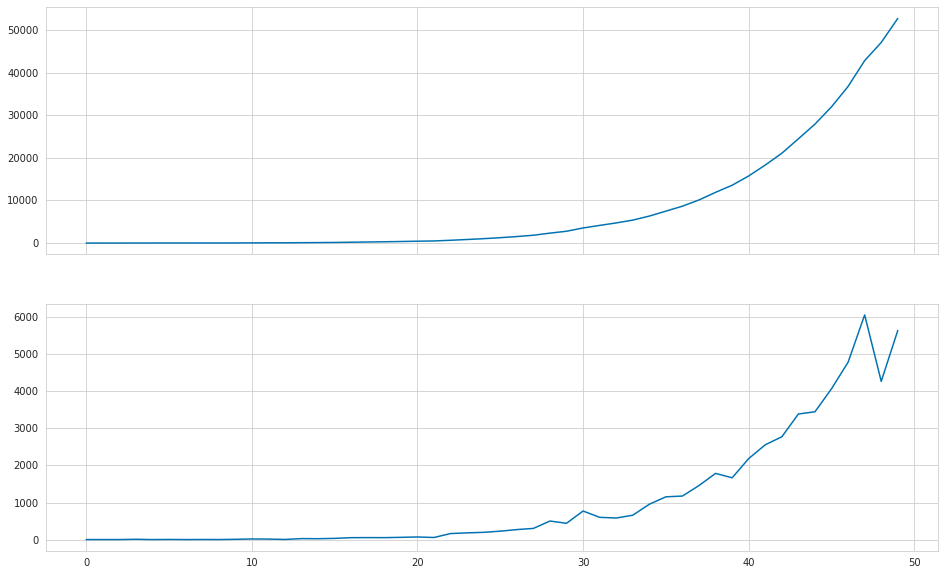

In [6]:
# Постройте графики целевых переменных
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=figsize)
x_train = np.array([float(i) for i, _ in enumerate(train_dataframe.date)]).reshape(-1, 1)
ax1.plot(x_train, train_dataframe.total_cases)
ax2.plot(x_train, train_dataframe.new_cases)

a. Используя линейную регрессию, обучите модель с экспоненциальным ростом числа заболевших: $ y \sim exp(ax + b) $, где $ x $ - номер текущего дня

In [7]:
exp_model_t = linear_model.LinearRegression().fit(x_train.reshape(-1, 1), np.log(train_dataframe.total_cases))
exp_model_n = linear_model.LinearRegression().fit(x_train.reshape(-1, 1), np.log(train_dataframe.new_cases))

50 samples in train, 309 samples in test


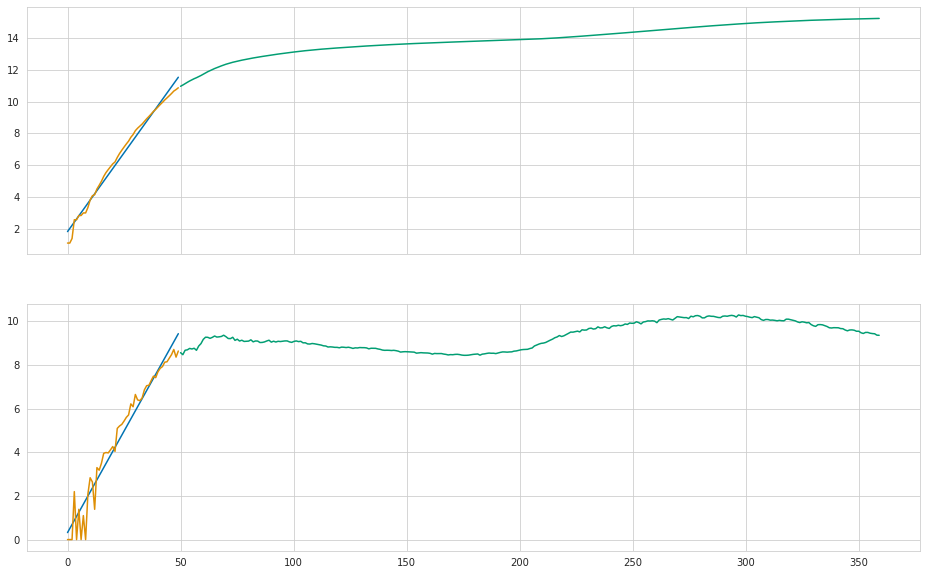

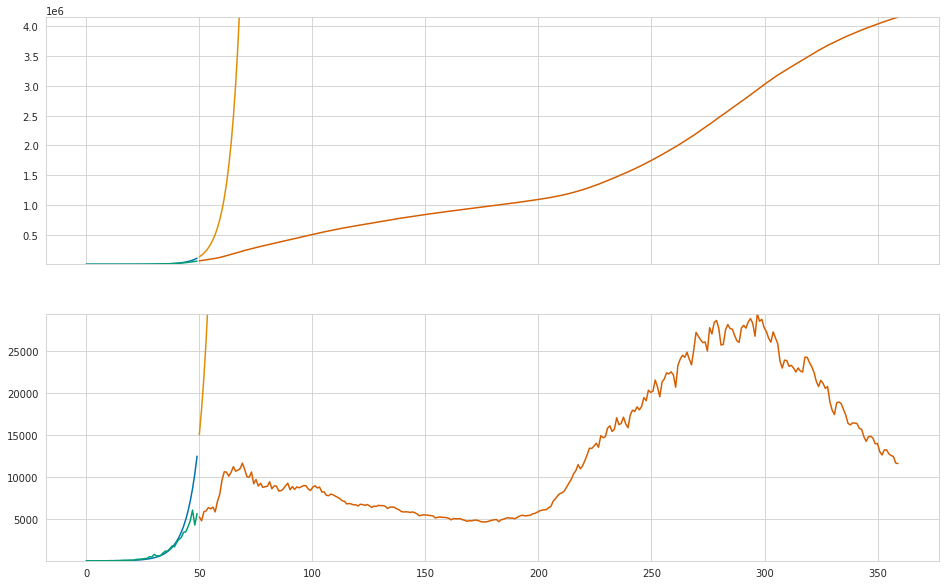

In [8]:
n_ = len(test_dataframe)
m_ = len(train_dataframe)
print(f'{m_} samples in train, {n_} samples in test')
x_test = np.linspace(m_, m_ + n_, n_).reshape(-1, 1)
# x_all = np.linspace(0, m_ + n_).reshape(-1, 1)
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=figsize)
# ax1.plot(x_test, exp_model_t.predict(x_test))
# ax2.plot(x_test, exp_model_n.predict(x_test))
ax1.plot(x_train, exp_model_t.predict(x_train))
ax2.plot(x_train, exp_model_n.predict(x_train))
ax1.plot(x_train, np.log(train_dataframe.total_cases))
ax2.plot(x_train, np.log(train_dataframe.new_cases))
ax1.plot(x_test, np.log(test_dataframe.total_cases))
ax2.plot(x_test, np.log(test_dataframe.new_cases))

fig, (ax3, ax4) = plt.subplots(2, sharex=True, figsize=figsize)
# ax3.plot(x_test, np.exp(exp_model_t.predict(x_test)))
# ax4.plot(x_test, np.exp(exp_model_n.predict(x_test)))
ax3.set_ylim(train_dataframe.total_cases.min(), test_dataframe.total_cases.max())
ax4.set_ylim(train_dataframe.new_cases.min(), test_dataframe.new_cases.max())
ax3.plot(x_train, np.exp(exp_model_t.predict(x_train)))
ax4.plot(x_train, np.exp(exp_model_n.predict(x_train)))
ax3.plot(x_test, np.exp(exp_model_t.predict(x_test)))
ax4.plot(x_test, np.exp(exp_model_n.predict(x_test)))
ax3.plot(x_train, train_dataframe.total_cases)
ax4.plot(x_train, train_dataframe.new_cases)
ax3.plot(x_test, test_dataframe.total_cases)
ax4.plot(x_test, test_dataframe.new_cases)

b. Найдите апостериорное распределение параметров этой модели для достаточно широкого априорного распределения. Требующееся для этого значение дисперсии шума в данных оцените, исходя из вашей же максимальной апостериорной модели (это фактически шаг эмпирического Байеса)

In [9]:
# not implemented yet

c. Посэмплируйте много разных экспонент, постройте графики.  
Сколько, исходя из этих сэмплов, предсказывается случаев коронавируса в России к 1 мая 2020 года?  
К 1 июня?  
К 1 сентября?  
Постройте предсказательные распределения (можно эмпирически, исходя из данных сэмплирования)

In [10]:
# not implemented yet

3. Предсказания экспоненциальной модели наверняка получились  грустными. Но это, конечно, чересчур пессимистично - экспоненциальный рост в природе никак не может продолжаться вечно. Кривая общего числа заболевших во время эпидемии в реальности имеет сигмоидальный вид: после начальной фазы экспоненциального роста неизбежно происходит насыщение. В качестве конкретной формы такой сигмоиды давайте возьмём форму функции распределения для гауссиана: $$ {\Phi(x)} = {1 \over \sqrt{2\pi}} \int_{-\infty}^{x} e^{{-t^2} \over 2} dt$$  
Естественно в нашем случае сигмоида стремится не к единице, т.е. константа перед интегралом может быть произвольной (и её можно внести в экспоненту), а в экспоненте под интегралом может быть произвольная квадратичная функция от $t$.

In [11]:
# todo: plot

a. Предложите способ обучать параметры такой сигмоидальной функции при помощи линейной регрессии.

In [12]:
x_train_2 = np.hstack([x_train, x_train ** 2])
sigm_model_t = linear_model.LinearRegression().fit(x_train_2, np.log(train_dataframe.total_cases))
sigm_model_n = linear_model.LinearRegression().fit(x_train_2, np.log(train_dataframe.new_cases))

50 samples in train, 309 samples in test


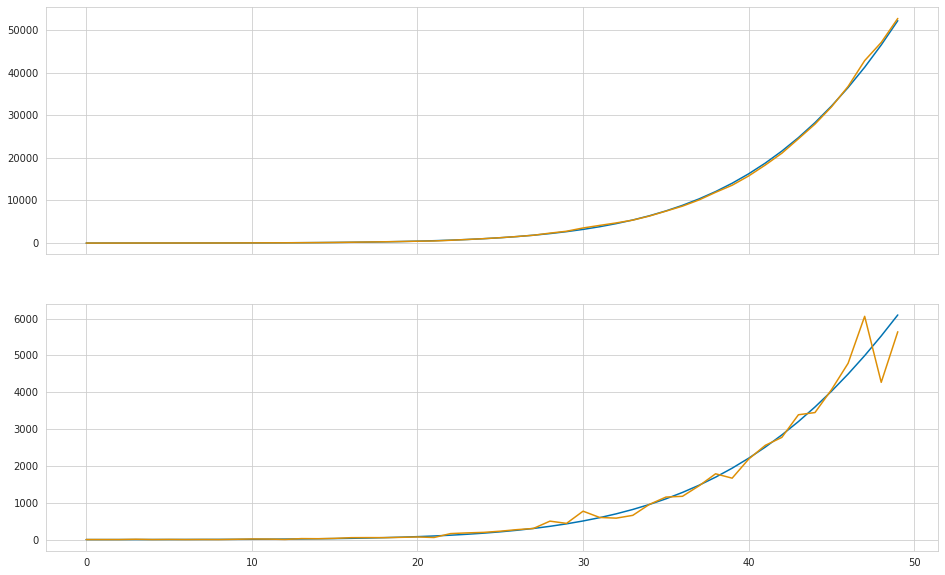

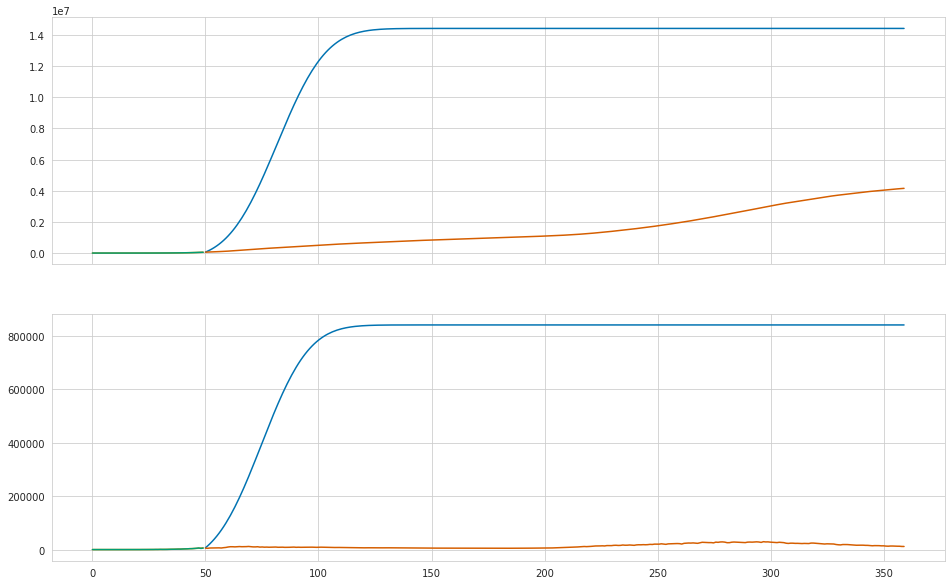

In [13]:
n_ = len(test_dataframe)
m_ = len(train_dataframe)
print(f'{m_} samples in train, {n_} samples in test')
x_test = np.linspace(m_, m_ + n_, n_).reshape(-1, 1)
x_test_2 = np.hstack([x_test, x_test ** 2])
# plot
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=figsize)
ax1.plot(x_train, np.exp(sigm_model_t.predict(x_train_2)))
ax2.plot(x_train, np.exp(sigm_model_n.predict(x_train_2)))
ax1.plot(x_train, train_dataframe.total_cases)
ax2.plot(x_train, train_dataframe.new_cases)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=figsize)
y = np.cumsum(np.exp(sigm_model_t.predict(x_test_2)))
ax1.plot(x_test, y)
y = np.cumsum(np.exp(sigm_model_n.predict(x_test_2)))
ax2.plot(x_test, y)
ax1.plot(x_train, np.exp(sigm_model_t.predict(x_train_2)))
ax2.plot(x_train, np.exp(sigm_model_n.predict(x_train_2)))
ax1.plot(x_train, train_dataframe.total_cases)
ax2.plot(x_train, train_dataframe.new_cases)
ax1.plot(x_test, test_dataframe.total_cases)
ax2.plot(x_test, test_dataframe.new_cases)


b. Обучите эти параметры на датасете случаев коронавируса в России. Найдите апостериорное распределение параметров этой модели для достаточно широкого априорного распределения. Требующееся для этого значение дисперсии шума в данных оцените, исходя из вашей же максимальной апостериорной модели.

In [14]:
# not implemented yet

c. Посэмплируйте много разных сигмоид из апостериорного распределения, постройте графики.  
Сколько, исходя из этих сэмплов, будет всего случаев коронавируса в России?  
Постройте эмпирическое предсказательное распределение, нарисуйте графики.  
Каков ваш прогноз числа случаев коронавируса в пессимистичном сценарии (90й процентиль в выборке числа случаев)?  
В оптимистичном сценарии (10й процентиль)?

In [15]:
# not implemented yet

4. Бонус: проведите такой же анализ для других стран (здесь придётся руками подобрать дни начала моделирования - коронавирус приходил в разные страны в разное время).  
Насколько разные параметры получаются?  
Можно ли разделить страны на кластеры (хотя бы чисто визуально) в зависимости от этих параметров?

In [16]:
# not implemented yet

5. Что вы поняли из этого упражнения?  
Что можно сказать про коронавирус по итогам такого моделирования?  
Как принять решение, например, о том, нужно ли вводить карантин?

In [18]:
# not implemented yet